In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns
import sympy as sp

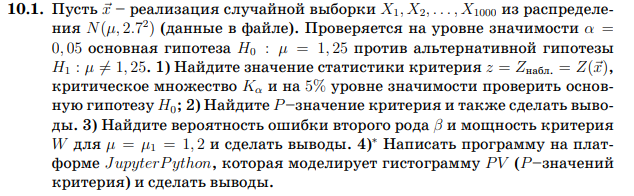

In [146]:
#1.1
sample = pd.read_csv('sample10_1_PM2022.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')
sample = sample.values
n = sample.size
std = 2.7
M0 = 1.25
alpha = 0.05
sample_mean = sample.mean()
sample_mean_destributon = norm(sample_mean, std/n**0.5)
z_stat = np.sqrt(len(sample))*(sample_mean-M0) / std
cvalue1 = norm.isf(alpha/2)
cvalue2 = -norm.isf(alpha/2)
if (cvalue1 > z_stat) & (z_stat > cvalue2):
    print('Нулевая гипотеза не отклоняется, ее значение находится между критических точек')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится между критических точек')
print(f'Z наблюдаемая = {z_stat}, критическая область : (-inf, {cvalue2}),({cvalue1}, +inf)')

Нулевая гипотеза не отклоняется, ее значение находится между критических точек
Z наблюдаемая = -0.5622343260114797, критическая область : (-inf, -1.9599639845400545),(1.9599639845400545, +inf)


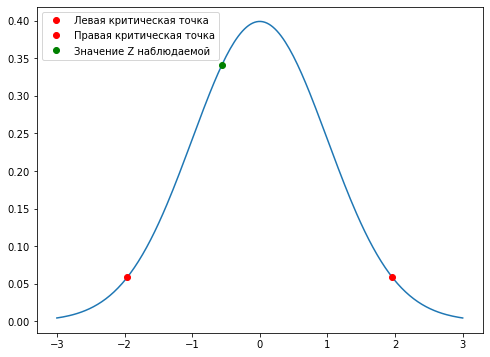

In [147]:
x = np.linspace(-3,3, 200)
plt.subplots(figsize = (8, 6))
plt.plot(x, norm.pdf(x))
plt.plot(cvalue2, norm.pdf(cvalue2), 'ro', label = 'Левая критическая точка')
plt.plot(cvalue1, norm.pdf(cvalue1), 'ro', label = 'Правая критическая точка')
plt.plot(z_stat, norm.pdf(z_stat), 'go', label = 'Значение Z наблюдаемой')
plt.legend(loc = 'upper left');

In [148]:
#1.2
sample = pd.read_csv('sample10_1_PM2022.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')
sample = sample.values
n = sample.size
std = 2.7
M0 = 1.25
alpha = 0.05
sample_mean = sample.mean()
z_stat = np.sqrt(len(sample))*(sample_mean-M0) / std
pvalue = 2*min(norm().cdf(z_stat), norm().sf(z_stat))
print('p-value =', pvalue, ', это больше уровня значимости alpha, соответственно, мы не можем отклонить нулевую гипотезу')

p-value = 0.5739563770550328 , это больше уровня значимости alpha, соответственно, мы не можем отклонить нулевую гипотезу


In [149]:
#1.3
M1 = 1.2
B = norm.cdf(norm.isf(alpha/2) - (n**0.5)/std * (M0-M1)) + norm.cdf(norm.isf(alpha/2) + (n**0.5)/std * (M0-M1)) - 1 
W = 1-B
print(f'B = {B}, W = {W}, соответственно высока вероятность ошибки второго рода при данных условиях.')
print(f'Можно сделать предположение, что значение матожидания генеральной совокупности ближе к M1')

B = 0.9098796029261775, W = 0.09012039707382247, соответственно высока вероятность ошибки второго рода при данных условиях.
Можно сделать предположение, что значение матожидания генеральной совокупности ближе к M1


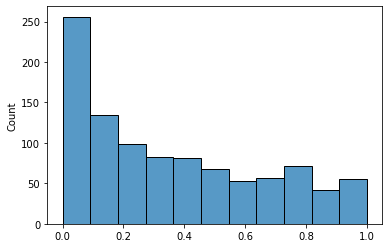

In [150]:
#1.4

def hist(mean, std, M0, alpha):
    data = norm(mean,std).rvs(100000)
    p_value = []
    for i in range(1000):
        sample = np.random.choice(data, 100)
        sample_mean = sample.mean()
        z_stat = np.sqrt(len(sample))*(sample_mean-M0) / std
        pvalue = 2*min(norm().cdf(z_stat), norm().sf(z_stat))
        p_value.append(pvalue)
    sns.histplot(p_value)
hist(2,3,2.32,0.05)

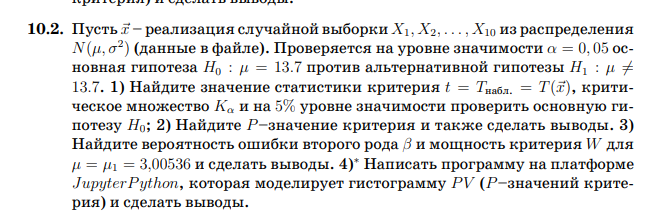

In [151]:
#2.1
sample = pd.read_csv('sample10_2_PM2022.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')
sample = sample.values
M0 = 13.7
alpha = 0.05
sample_mean = sample.mean()
n = sample.size
t_stat = n**(1/2) * (sample_mean - M0) / sample.var(ddof = 1)**(1/2)
t_stat
cvalue1 = t(n-1).isf(alpha/2)
cvalue2 = -t(n-1).isf(alpha/2)
if (cvalue1 > t_stat) & (t_stat > cvalue2):
    print('Нулевая гипотеза не отклоняется, ее значение находится между критических точек')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится между критических точек')
print(f'T наблюдаемая = {t_stat}, критическая область : (-inf, {cvalue2}),({cvalue1}, +inf)')

Нулевая гипотеза не отклоняется, ее значение находится между критических точек
T наблюдаемая = 0.5831039501860182, критическая область : (-inf, -2.262157162740992),(2.262157162740992, +inf)


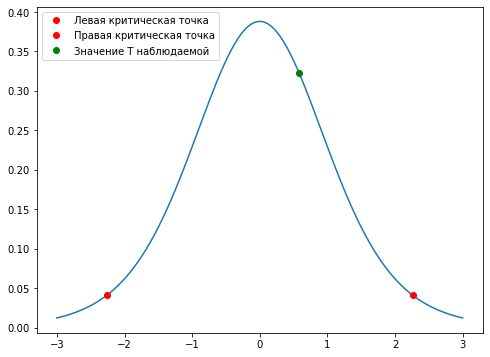

In [152]:
x = np.linspace(-3,3, 200)
plt.subplots(figsize = (8, 6))
plt.plot(x, t(n-1).pdf(x))
plt.plot(cvalue2, t(n-1).pdf(cvalue2), 'ro', label = 'Левая критическая точка')
plt.plot(cvalue1, t(n-1).pdf(cvalue1), 'ro', label = 'Правая критическая точка')
plt.plot(t_stat, t(n-1).pdf(t_stat), 'go', label = 'Значение T наблюдаемой')
plt.legend(loc = 'upper left');

In [153]:
#2.2
pvalue = 2*min(t(n-1).cdf(t_stat), t(n-1).sf(t_stat))
print('p-value =', pvalue, ', это больше уровня значимости alpha, соответственно, мы не можем отклонить нулевую гипотезу')

p-value = 0.5741416681136751 , это больше уровня значимости alpha, соответственно, мы не можем отклонить нулевую гипотезу


In [154]:
#2.3
M1 = 3.00536
delta = np.sqrt(n) * (M1 - M0) / sample.var(ddof = 1)**(1/2)
B = nct(nc = delta, df = n-1).cdf(t(n-1).isf(alpha/2)) - nct(nc = delta, df = n-1).cdf(-t(n-1).isf(alpha/2))
W = 1-B
print(f'B = {B}, W = {W}, вероятность ошибки второго рода при данных условиях низкая.')
print(f'Можно сделать предположение, что значение матожидания генеральной совокупности ближе к M0')

B = 0.018951270387962182, W = 0.9810487296120378, вероятность ошибки второго рода при данных условиях низкая.
Можно сделать предположение, что значение матожидания генеральной совокупности ближе к M0


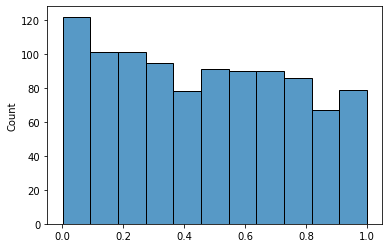

In [155]:
#2.4

def hist(mean, std, M0, alpha):
    data = norm(mean,std).rvs(100000)
    
    p_value = []
    for i in range(1000):
        sample = np.random.choice(data, 10)
        sample_mean = sample.mean()
        std = sample.var(ddof = 1)**(1/2)
        t_stat = np.sqrt(len(sample))*(sample_mean-M0) / std
        pvalue = 2*min(t(len(sample) - 1).cdf(t_stat), t(len(sample) - 1).sf(t_stat))
        p_value.append(pvalue)
    sns.histplot(p_value)
hist(15, 10, 13.7 ,0.05)

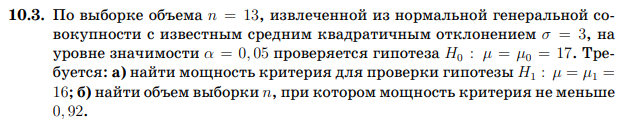

In [156]:
#3.a
n = 13
std = 3
M0 = 17
M1 = 16
alpha = 0.05
B = norm.cdf(norm.isf(alpha) - (n**0.5)/std * (M0-M1))
W = 1-B
print(f'Мощность критерия равна {W}')

Мощность критерия равна 0.3288817094062537


In [157]:
#3.б
W1 = W
N = 13
while W1 < 0.92:
    N += 1
    B1 = norm.cdf(norm.isf(alpha) - (N**0.5)/std * (M0-M1))
    W1 = 1-B1
print(f'Необходим объем выборки более {N}')

Необходим объем выборки более 84


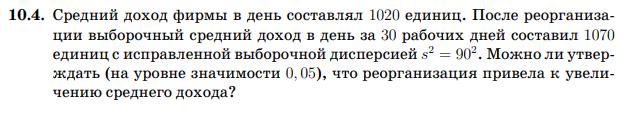

In [170]:
#4
# H0 - средний доход не увеличился после реорганизации
# H1 - реогранизация привела к увеличению среднего дохода
M0 = 1020
mean = 1070
n = 30
s = 90
alpha = 0.05
t_stat = n**(1/2) * (mean - M0) / 90
pvalue = t(n-1).sf(t_stat)
print(f'p-value = {pvalue}')
if (pvalue > alpha):
    print('Нулевая гипотеза не отклоняется, p-value больше уровня значимости')
else:
    print('Нулевая гипотеза отклоняется, p-value меньше уровня значимости, следует принять альтернативную гипотезу')

p-value = 0.0024697366791830372
Нулевая гипотеза отклоняется, p-value меньше уровня значимости, следует принять альтернативную гипотезу


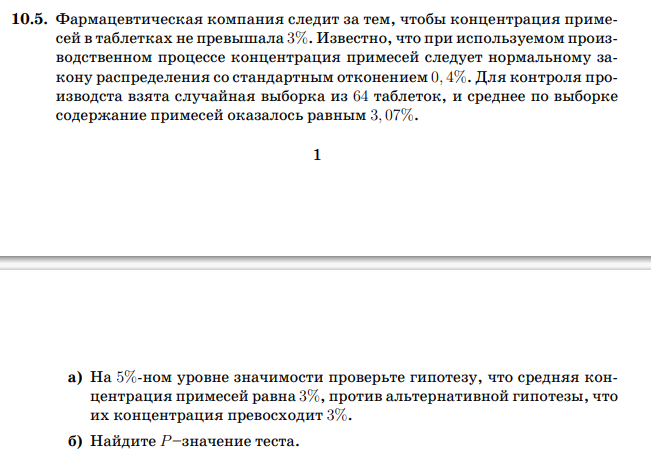

In [174]:
#5.a  (1 способ)
M0 = 3
n = 64
mean = 3.07
std = 0.4
alpha = 0.05
z_stat = np.sqrt(64)*(mean-M0) / std
pvalue = norm.sf(z_stat)
print(f'p-value = {pvalue}')
if (pvalue > alpha):
    print('Нулевая гипотеза не отклоняется, p-value больше уровня значимости')
else:
    print('Нулевая гипотеза отклоняется, p-value меньше уровня значимости, следует принять альтернативную гипотезу')

p-value = 0.08075665923377151
Нулевая гипотеза не отклоняется, p-value больше уровня значимости


In [179]:
#5.a  (2 способ)
cvalue = norm.isf(alpha)
if (cvalue > z_stat):
    print('Нулевая гипотеза не отклоняется, ее значение находится внутри критической обасти')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится внутри критической обасти')
print(f'Z наблюдаемая = {z_stat}, критическая область : ({cvalue}, +inf)')

Нулевая гипотеза не отклоняется, ее значение находится внутри критической обасти
Z наблюдаемая = 1.3999999999999968, критическая область : (1.6448536269514729, +inf)


In [181]:
#5.б
print(f'p-value = {pvalue}')

p-value = 0.08075665923377151


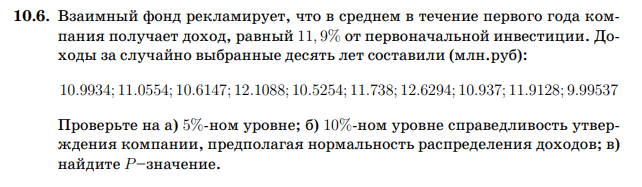

In [215]:
sample = list(map(lambda x: float(x),'10.9934; 11.0554; 10.6147; 12.1088; 10.5254; 11.738; 12.6294; 10.937; 11.9128; 9.99537'.split(';')))
sample = np.array(sample)
M0 = 11.9
mean = sample.mean()
n = len(sample)
s = sample.var(ddof = 1)**(1/2)
t_stat = n**(1/2) * (mean - M0) / s

In [216]:
#6.a
alpha = 0.05
cvalue1 = t(n-1).isf(alpha/2)
cvalue2 = -t(n-1).isf(alpha/2)
if (cvalue1 > t_stat) & (t_stat > cvalue2):
    print('Нулевая гипотеза не отклоняется, ее значение находится между критических точек')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится между критических точек')
print(f'Z наблюдаемая = {t_stat}, критическая область : (-inf, {cvalue2}),({cvalue1}, +inf)')

Нулевая гипотеза отклоняется, ее значение не находится между критических точек
Z наблюдаемая = -2.5088353084630746, критическая область : (-inf, -2.262157162740992),(2.262157162740992, +inf)


In [217]:
#6.б
alpha = 0.1
cvalue1 = t(n-1).isf(alpha/2)
cvalue2 = -t(n-1).isf(alpha/2)
if (cvalue1 > t_stat) & (t_stat > cvalue2):
    print('Нулевая гипотеза не отклоняется, ее значение находится между критических точек')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится между критических точек')
print(f'Z наблюдаемая = {t_stat}, критическая область : (-inf, {cvalue2}),({cvalue1}, +inf)')

Нулевая гипотеза отклоняется, ее значение не находится между критических точек
Z наблюдаемая = -2.5088353084630746, критическая область : (-inf, -1.8331129326536337),(1.8331129326536337, +inf)


In [219]:
#6.в
pvalue = 2*min(t(n-1).cdf(t_stat), t(n-1).sf(t_stat))
print(f'p-value = {pvalue}')

p-value = 0.03337447452125529


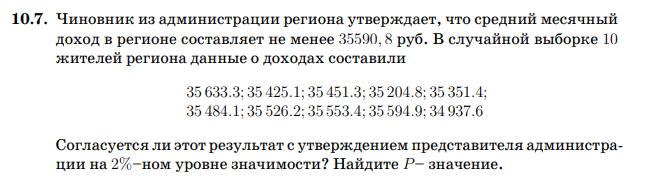

In [239]:
#7
#H0 средний месячный доход не ниже 35590.8
#H1 средний месячный доход ниже 35590.8
sample = list(map(lambda x: float(x), '35 633.3; 35 425.1; 35 451.3; 35 204.8; 35 351.4; 35 484.1; 35 526.2; 35 553.4; 35 594.9; 34 937.6'.replace(' ','').split(';')))
sample = np.array(sample)
alpha = 0.02
M0 = 35590.8
n = sample.size
mean = sample.mean()
s = sample.var(ddof = 1)**(1/2)
t_stat = n**(1/2) * (mean - M0) / s
pvalue = t(n-1).cdf(t_stat)
print(f'p-value = {pvalue}')
if (pvalue > alpha):
    print('Нулевая гипотеза не отклоняется, p-value больше уровня значимости')
else:
    print('Нулевая гипотеза отклоняется, p-value меньше уровня значимости, следует принять альтернативную гипотезу')

p-value = 0.013474792304269737
Нулевая гипотеза отклоняется, p-value меньше уровня значимости, следует принять альтернативную гипотезу


In [240]:
#7 через критические точки
cvalue = -t(n-1).isf(alpha)
if (cvalue > z_stat):
    print('Нулевая гипотеза не отклоняется, ее значение находится внутри критической обасти')
else:
    print('Нулевая гипотеза отклоняется, ее значение не находится внутри критической обасти')
print(f'T наблюдаемая = {t_stat}, критическая область : (-inf; {cvalue})')

Нулевая гипотеза отклоняется, ее значение не находится внутри критической обасти
T наблюдаемая = -2.639188999981983, критическая область : (-inf; -2.398440984714667)


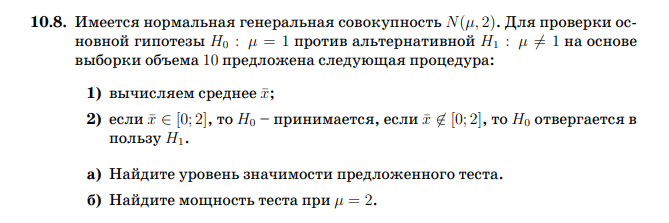

In [246]:
#8.a
x = norm(1, (2/10)**0.5)
alpha = x.cdf(0) + x.sf(2)
print(f'alpha = {alpha}')

alpha = 0.025347318677468252


In [247]:
#8.б
M1 = 2
std = 2**0.5
M0 = 1
B = norm.cdf(norm.isf(alpha/2) - (n**0.5)/std * (M0-M1)) + norm.cdf(norm.isf(alpha/2) + (n**0.5)/std * (M0-M1)) - 1 
W = 1 - B
print(f'Мощность теста = {W}')

Мощность теста = 0.5000038721082154


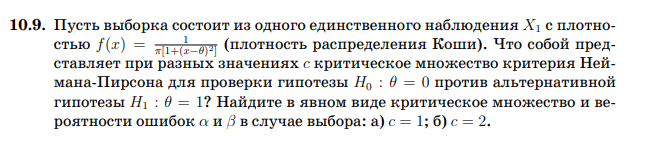

In [315]:
#9
theta0, theta1, x = sp.symbols('theta_0, theta_1, x')

C0 = cauchy(loc = 0, scale = 1)
C1 = cauchy(loc = 1, scale = 1)
Pirson = sp.simplify((1/(sp.pi *(1 + (x - theta1)**2)))/(1/(sp.pi *(1 + (x - theta0)**2))))
Pirson

((theta_0 - x)**2 + 1)/((theta_1 - x)**2 + 1)

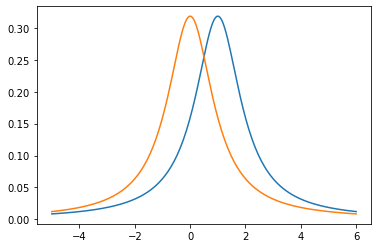

In [307]:
x = np.linspace(-5,6,200)
plt.plot(x, C1.pdf(x))
plt.plot(x, C0.pdf(x))

In [316]:
Pirson = Pirson.subs([(theta0, 0), (theta1, 1)])
Pirson

(x**2 + 1)/((1 - x)**2 + 1)

In [333]:
#9.a
c = 1
cvalue = sp.solve(Pirson - c, x)[0]
cvalue = float(cvalue)
alpha = C0.cdf(cvalue)
beta = C1.sf(cvalue)
print(f'Критичесикая область ({cvalue}; + inf)')
print(f'alpha = {alpha}, beta = {beta}')

Критичесикая область (0.5; + inf)
alpha = 0.6475836176504333, beta = 0.6475836176504333


In [332]:
#9.б
c = 2
cvalue1 = float(sp.solve(Pirson - c, x)[0])
cvalue2 = float(sp.solve(Pirson - c, x)[1])
alpha = C0.sf(cvalue2) + C0.cdf(cvalue1) 
beta = C1.sf(cvalue1) - C1.sf(cvalue2) 
print(f'Критичесикая область (- inf ; {cvalue1}),({cvalue2}; + inf)')
print(f'alpha = {alpha}, beta = {beta}')

Критичесикая область (- inf ; 1.0),(3.0; + inf)
alpha = 0.8524163823495667, beta = 0.35241638234956674
